In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report

import warnings
warnings.filterwarnings("ignore")

In [268]:
df = pd.read_csv('/Users/saptarshipal/DATA/pokemon/data/Pokemon.csv')
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [269]:
df.isnull().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [270]:
df1 = df.copy()
df1.drop(columns=['number','name'],axis =1,inplace=True)


In [271]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type1       1072 non-null   object
 1   type2       574 non-null    object
 2   total       1072 non-null   int64 
 3   hp          1072 non-null   int64 
 4   attack      1072 non-null   int64 
 5   defense     1072 non-null   int64 
 6   sp_attack   1072 non-null   int64 
 7   sp_defense  1072 non-null   int64 
 8   speed       1072 non-null   int64 
 9   generation  1072 non-null   int64 
 10  legendary   1072 non-null   bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 84.9+ KB


In [272]:
columns1 = ['type1','type2','legendary']

for col in columns1:
    print(f'The number of unique values in {col} are \n{df1[col].nunique()} \nand the values are \n\n{df1[col].unique()}\n\n')

The number of unique values in type1 are 
20 
and the values are 

['Grass' 'Fire' 'Water' 'Blastoise' 'Bug' 'Normal' 'Dark' 'Poison'
 'Electric' 'Ground' 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock'
 'Ghost' 'Dragon' 'Flying' 'Graass']


The number of unique values in type2 are 
18 
and the values are 

['Poison' nan 'Flying' 'Dragon' 'Water' 'Normal' 'Psychic' 'Steel'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost'
 'Rock' 'Fire' 'Bug']


The number of unique values in legendary are 
2 
and the values are 

[False  True]




In [273]:
df1[df1['type1']=='Graass']

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
978,Graass,NaN,460,60,50,90,80,120,60,8,False


In [274]:
df1[df1['type1']=='Graass'].index

Index([978], dtype='int64')

In [275]:
df1.loc[978,'type1'] = 'Grass'

# Encoding

In [276]:
df1['type1'] = df1['type1'].replace({'Blastoise':1,
'Bug':2,
'Dark':3,
'Dragon':4,
'Electric':5,
'Fairy':6,
'Fighting':7,
'Fire':8,
'Flying':9,
'Ghost':10,
'Grass':11,
'Ground':12,
'Ice':13,
'Normal':14,
'Poison':15,
'Psychic':16,
'Rock':17,
'Steel':18,
'Water':19})

df1['type2'] = df1['type2'].replace({'Blastoise':1,
'Bug':2,
'Dark':3,
'Dragon':4,
'Electric':5,
'Fairy':6,
'Fighting':7,
'Fire':8,
'Flying':9,
'Ghost':10,
'Grass':11,
'Ground':12,
'Ice':13,
'Normal':14,
'Poison':15,
'Psychic':16,
'Rock':17,
'Steel':18,
'Water':19})

df1['legendary'] = LabelEncoder().fit_transform(df1['legendary'])

# Imputing

In [277]:
df1.isnull().sum()

type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [278]:
df1['type2'] = df1['type2'].fillna('0')

# Visualisation

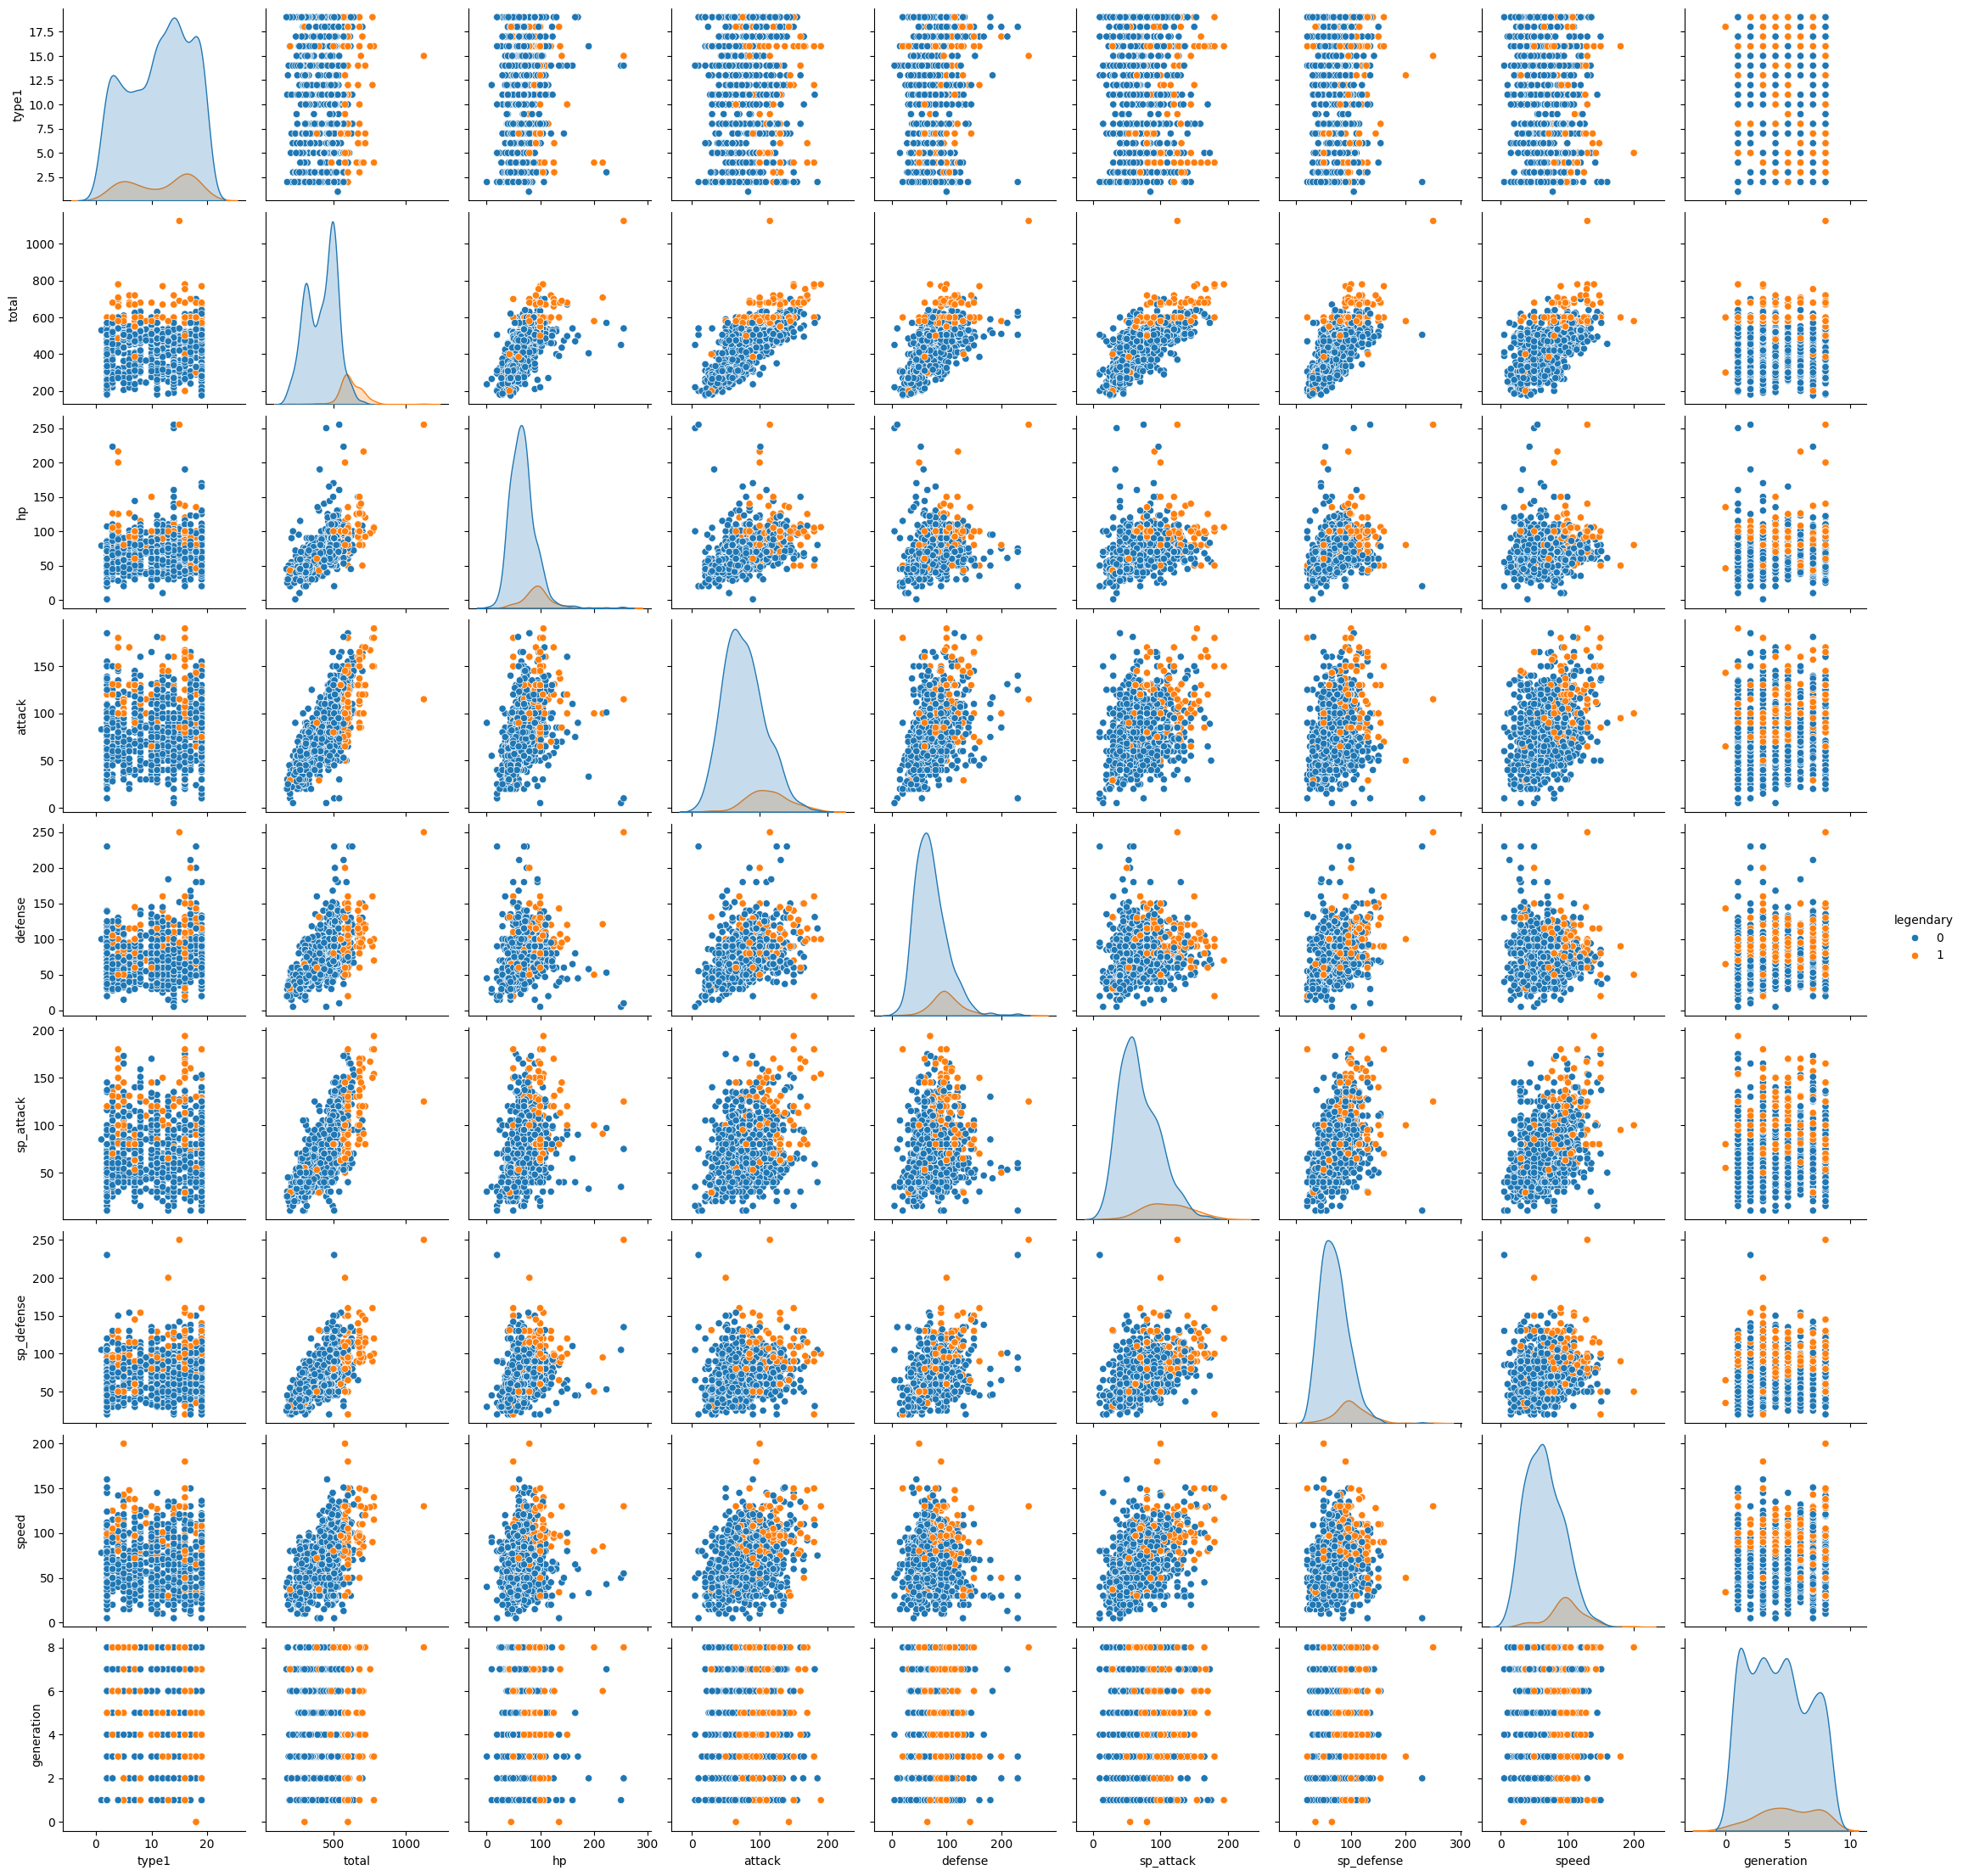

In [279]:
sns.pairplot(df1,hue='legendary')
plt.show()

<Axes: >

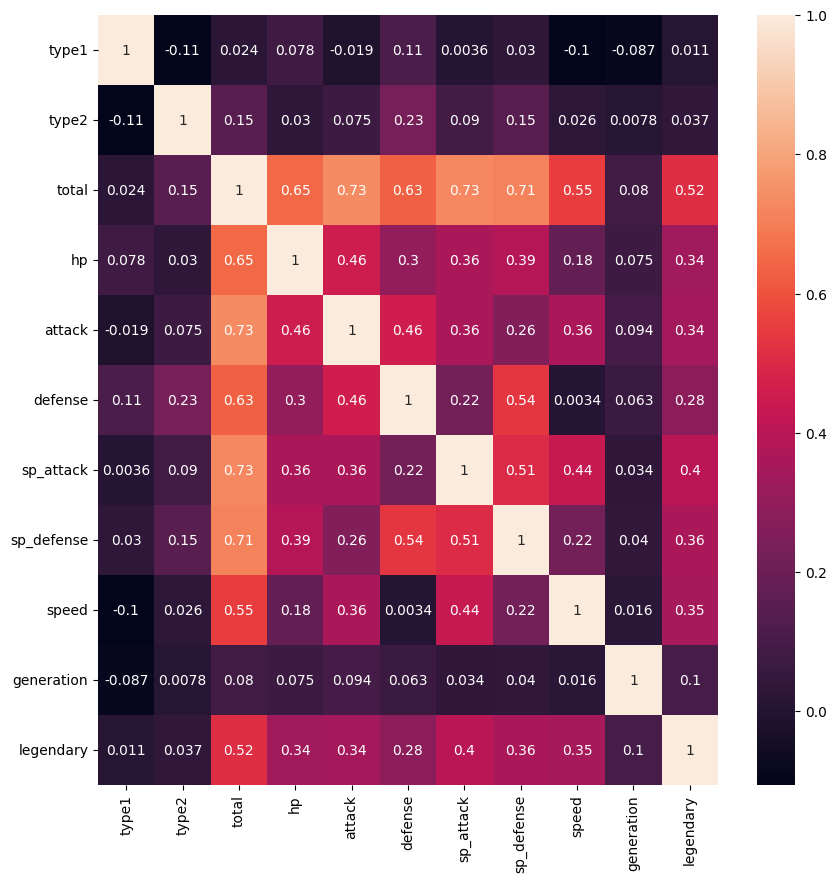

In [280]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

In [281]:
#dropping total as it is the sum of the following columns, hp', 'attack', 'defense', 'sp_attack','sp_defense', 'speed', 'generation', 'legendary'.

df1.drop(columns='total',axis=1,inplace=True)

# Splitting the dataset

In [282]:
y = df1['legendary']
X = df1.drop(columns='legendary',axis=1)

print(y.shape,X.shape)

(1072,) (1072, 9)


In [283]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=207)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(857, 9) (215, 9) (857,) (215,)


# Scaling

In [284]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()


X_train_sc = scaler1.fit_transform(X_train)
X_train = pd.DataFrame(X_train_sc,columns=X_train.columns)

X_test_sc = scaler1.fit_transform(X_test)
X_test = pd.DataFrame(X_test_sc,columns=X_test.columns)


# Modelling

In [290]:
def evaluate_model(X_train,X_test,y_train,y_test):
    
    models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(), 
    "MLPClassifier": MLPClassifier(),
    "RandomForestClassifier": RandomForestClassifier(), 
    "GradientBoostingClassifier": GradientBoostingClassifier()
    }
     
    results= []
    for name,model in models.items():
         
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        results.append({'name':name,'model':model,'accuracy':accuracy})
         
    df_results = pd.DataFrame(results).sort_values(by = 'accuracy',ascending = False,ignore_index=True)
    return df_results

df_scores = evaluate_model(X_train,X_test,y_train,y_test)
print(df_scores)
         
         

                         name  \
0      RandomForestClassifier   
1         Logistic Regression   
2   Support Vector Classifier   
3               Random Forest   
4  GradientBoostingClassifier   
5         K-Nearest Neighbors   
6               MLPClassifier   
7               Decision Tree   

                                               model  accuracy  
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.944186  
1                               LogisticRegression()  0.939535  
2                                              SVC()  0.939535  
3  (DecisionTreeClassifier(max_features='sqrt', r...  0.939535  
4  ([DecisionTreeRegressor(criterion='friedman_ms...  0.939535  
5                             KNeighborsClassifier()  0.925581  
6                                    MLPClassifier()  0.920930  
7                           DecisionTreeClassifier()  0.906977  


In [293]:
print(f"The best model is {df_scores.iloc[0,0]} with accuracy score of {df_scores.iloc[0,2]}.")

The best model is RandomForestClassifier with accuracy score of 0.9441860465116279.


In [300]:
selected_model = df_scores.iloc[0,1]
selected_model

RandomForestClassifier()

In [302]:
selected_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}